# Kaggle Competition - House Prices: Advanced Regression Techniques 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read dataset
df = pd.read_csv("train.csv")

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.shape

(1460, 81)

In [5]:
#to display all the values
pd.set_option('display.max_rows', None)
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

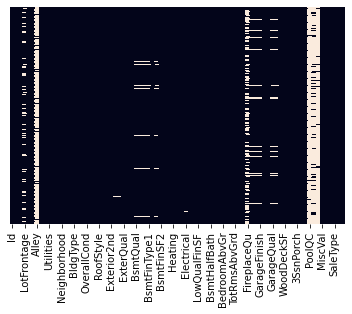

In [6]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Full missing values
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [9]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
#As more than 50% val are null, so I am dropping it
df.drop(['Alley'], axis=1, inplace=True)

In [11]:
#Full missing categorical  values
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [12]:
#Full missing categorical  values
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
 
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [14]:
#Full missing categorical  values
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
#As more than 50% val are null, so I am dropping it
df.drop(['PoolQC',"Fence",'MiscFeature'], axis=1, inplace=True)

In [16]:
df.shape

(1460, 76)

In [17]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [18]:
df.drop(['Id'],axis=1,inplace=True)


In [19]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="coolwarm")

In [ ]:
#Full missing values
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="YlGnBu")

In [ ]:
#Full missing values
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="YlGnBu")

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
#handle categorical feature

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']


In [ ]:
len(columns)

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
main_df=df.copy()

In [ ]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')


In [ ]:
test_df.shape

In [ ]:
test_df.head()

In [ ]:
final_df=pd.concat([df,test_df],axis=0)

In [ ]:
final_df.shape

In [ ]:
final_df=category_onehot_multcols(columns)

In [ ]:
final_df.shape

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

In [ ]:
final_df

In [ ]:
#dividing train and test sets
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [ ]:
df_Train.head()

In [ ]:
df_Test.head()

In [ ]:
df_Train.shape

In [ ]:
df_Test.shape

In [ ]:
final_df['SalePrice']

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Prediciton and selecting the Algorithm

In [ ]:
#hyperparameter
import xgboost

In [ ]:
from sklearn.preprocessing import StandardScaler
classifier = xgboost.XGBClassifier()
scaler = StandardScaler()
x_trainScaled = scaler.fit_transform(X_train)
classifier.fit(x_trainScaled, y_train)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
y_pred=classifier.predict(df_Test)
y_pred

In [ ]:
##Create Sample Submission file and Submit
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets= pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns= ['Id','SalePrice']
datasets.to_csv('sample_submission.csv', index=False)